This notebook demonstrates how to use the CLIP model in PyTorch for zero-shot classification of images based on natural language prompts.

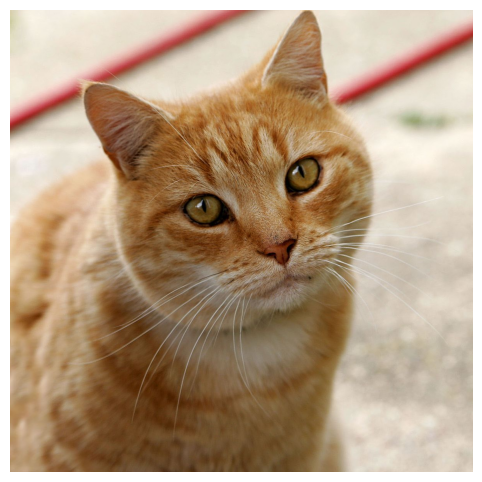

In [12]:
import requests
from PIL import Image
import matplotlib.pyplot as plt
import io

def load_and_display_image(url):
    try:
        # Fetch the image from the URL
        response = requests.get(url)

        # Check if the request was successful
        if response.status_code == 200:
            # Open image using PIL
            image_bytes = io.BytesIO(response.content)
            img = Image.open(image_bytes)

            # Display the image using matplotlib
            plt.figure(figsize=(8, 6))
            plt.imshow(img)
            plt.axis('off')  # Hide axes for better display
            plt.show()
        else:
            print(f"Failed to fetch image from {url}. Status code: {response.status_code}")

    except Exception as e:
        print(f"Error loading or displaying image from {url}: {e}")

# Example URL from Wikimedia Commons (Cat image)
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Cat03.jpg/1200px-Cat03.jpg"
load_and_display_image(url)


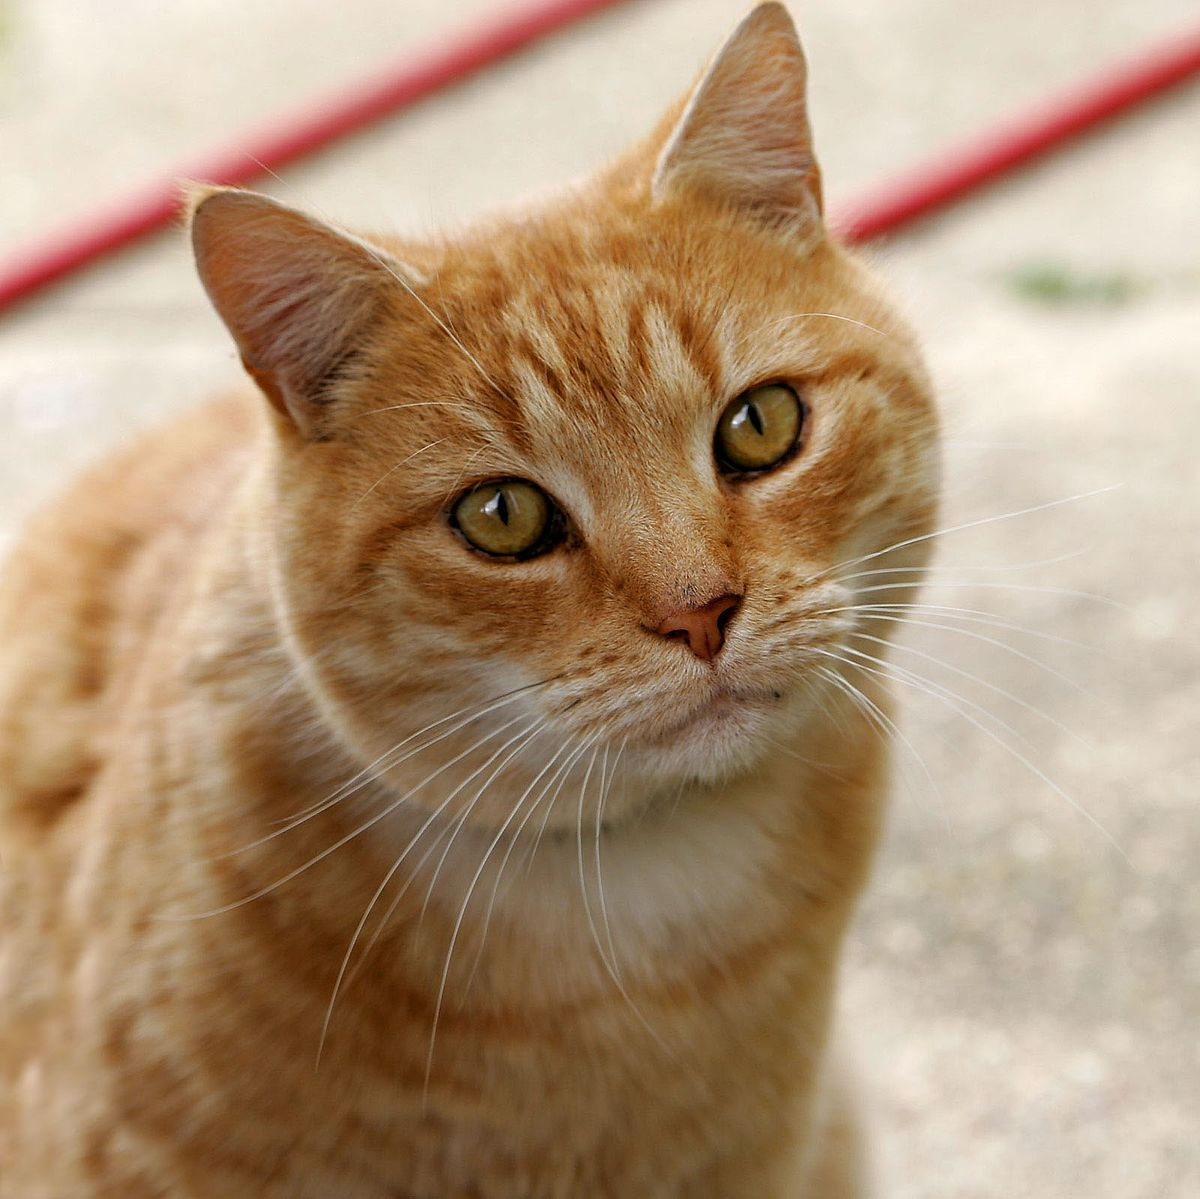

Prompt: 'a photo of a cat'
Probability: 0.8898

Prompt: 'a scenic view of mountains with a cat'
Probability: 0.0007

Prompt: 'a modern living room'
Probability: 0.0000

Prompt: 'super cute cat'
Probability: 0.1095



In [16]:
import torch
import clip
from PIL import Image
from torchvision import transforms
import requests
from io import BytesIO
from IPython.display import display

# Function to load an image from URL with improved error handling
def load_image_from_url(url):
    try:
        response = requests.get(url)
        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            image = Image.open(BytesIO(response.content))
            return image
        else:
            print(f"Failed to retrieve image from URL: HTTP status code {response.status_code}")
            return None
    except (requests.RequestException, IOError) as e:
        print(f"Error loading image from URL: {e}")
        return None

# Example usage of CLIP for zero-shot classification
if __name__ == "__main__":
    try:
        # Initialize the model
        device = "cuda" if torch.cuda.is_available() else "cpu"
        model, preprocess = clip.load("ViT-B/32", device=device)

        # Example URL of the image
        image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Cat03.jpg/1200px-Cat03.jpg"

        # Load the image from URL
        image = load_image_from_url(image_url)

        if image is not None:
            # Preprocess the image
            image_input = preprocess(image).unsqueeze(0).to(device)

            # Example text prompts for zero-shot classification
            text_prompts = ["a photo of a cat", "a scenic view of mountains with a cat", "a modern living room", "super cute cat" ]

            # Perform zero-shot classification
            with torch.no_grad():
                image_features = model.encode_image(image_input)

                # Tokenize and encode text prompts
                text_tokens = clip.tokenize(text_prompts).to(device)
                text_features = model.encode_text(text_tokens)

                # Calculate similarity scores
                logits_per_image, logits_per_text = model(image_input, text_tokens)
                probs = logits_per_image.softmax(dim=-1).cpu().numpy()

            # Display the image
            display(image)

            # Print the zero-shot classification results
            for i, prompt in enumerate(text_prompts):
                print(f"Prompt: '{prompt}'")
                print(f"Probability: {probs[0][i]:.4f}")
                print()
        else:
            print("Failed to load the image.")

    except Exception as e:
        print(f"Error: {e}")


### Code Explanation:

The code provided performs the following steps:

1. **Imports and Error Handling:**
   - It imports necessary libraries (`torch`, `clip`, `PIL`, `requests`, `IPython.display`) and handles potential import errors by attempting to install missing packages.
   
2. **Function Definitions:**
   - `load_image_from_url(url)`: This function loads an image from a given URL using `requests` and `PIL` libraries. It returns the loaded `Image` object or `None` if there's an error.
   
3. **Zero-shot Learning with CLIP:**
   - The main section (`if __name__ == "__main__"`) initializes the CLIP model (`"ViT-B/32"`) and determines the device (CPU or GPU) to use (`device = "cuda"` or `"cpu"`).
   
   - **Image Loading and Preprocessing:**
     - Loads an example image from a URL (`image_url`) using `load_image_from_url()`.
     - Preprocesses the image using `preprocess` function obtained from `clip.load()` to prepare it for input to the CLIP model (`image_input`).

   - **Text Prompts:**
     - Defines example text prompts (`text_prompts`) for zero-shot classification. These prompts describe different concepts or classes that we want the model to classify the image against without any specific training on these classes.

   - **Zero-shot Classification:**
     - Uses the CLIP model to encode both the image (`image_features = model.encode_image(image_input)`) and the text prompts (`text_features = model.encode_text(text_tokens)`).
     
     - Calculates similarity scores between the image and each text prompt using `model(image_input, text_tokens)` which returns `logits_per_image` and `logits_per_text`.
     
     - Computes probabilities (`probs`) by applying softmax to `logits_per_image`, providing a probability distribution over the text prompts.

   - **Display Results:**
     - Displays the loaded image using `IPython.display.display(image)`.
     - Prints the results of zero-shot classification for each prompt, showing the prompt and its corresponding probability.

### Zero-shot Learning Concept:

**Zero-shot learning** refers to the ability of a model to recognize and classify objects or concepts without the need for labeled training examples specific to those classes. Instead, the model relies on its understanding of textual descriptions (natural language prompts) and visual inputs to make predictions. This capability is particularly powerful in scenarios where:

- **Unseen Classes:** The model can classify images into categories that were not explicitly seen or labeled during training.
  
- **Few-shot Learning Extension:** Zero-shot learning is often extended to **few-shot learning**, where the model may have a few examples (few-shot examples) from a new class to improve classification accuracy.

### Applications of Zero-shot Learning with CLIP:

1. **Cross-modal Retrieval:**
   - CLIP can be used to retrieve images based on textual descriptions or retrieve text based on image queries. This is useful in content-based image retrieval systems.

2. **Multimodal Classification:**
   - Applications where images need to be classified into a large number of categories without the need for extensive labeled training data for each category.

3. **Semantic Understanding:**
   - Understanding and predicting relationships between visual content and textual descriptions, which can enhance search engines, recommendation systems, and content moderation.

4. **Generative Tasks:**
   - Guiding generative models (like GANs) in producing images based on textual descriptions, enabling more precise control over generated outputs.

5. **Adaptation to New Domains:**
   - Zero-shot learning allows models to quickly adapt to new domains or tasks by leveraging existing textual descriptions and transferring knowledge from pre-trained models.

### Conclusion:

Zero-shot learning with CLIP represents a significant advancement in AI capabilities, enabling models to generalize across different modalities (text and image) and perform complex tasks without the need for extensive labeled data. Its versatility makes it applicable across various domains, from content understanding and retrieval to creative generation tasks. As the field continues to evolve, we can expect further innovations and applications leveraging models like CLIP to enhance AI-driven systems.